In [61]:
import datetime
start_time = datetime.datetime.now()

# Environment Setup

In [62]:
import io
import os
import shutil
import zipfile
import urllib.request
import subprocess
import requests

# Set the working directory
os.chdir('C:/GitHub/CoAuthorViz_Dashboard')

In [63]:
execute_code = False

In [64]:
if execute_code:
    # Remove existing files and directories
    # List all files and directories to remove
    files_dirs = ['CoAuthorViz', 'CoAuthorViz.zip', 'coauthor-v1.0']

    for item in files_dirs:
        if os.path.exists(item):
            # Check if it is a file or directory
            if os.path.isfile(item):
                os.remove(item)  # remove file
            else:
                shutil.rmtree(item)  # remove directory
        else:
            print(f"{item} does not exist.")

    # Download CoAuthorViz.zip
    coauthorviz_url = 'https://docs.google.com/uc?export=download&id=1gnVk165ncvOXyVhGZ6Cf2wVZ5NV4-qLz'
    urllib.request.urlretrieve(coauthorviz_url, 'CoAuthorViz.zip')

    # Unzip CoAuthorViz.zip
    with zipfile.ZipFile('CoAuthorViz.zip', 'r') as zip_ref:
        zip_ref.extractall()

    # Close the files
    zip_ref.close()

    # Download chi2022-coauthor-v1.0.zip
    dataset_url = 'https://cs.stanford.edu/~minalee/zip/chi2022-coauthor-v1.0.zip'
    urllib.request.urlretrieve(dataset_url, 'chi2022-coauthor-v1.0.zip')

    # Unzip chi2022-coauthor-v1.0.zip
    with zipfile.ZipFile('chi2022-coauthor-v1.0.zip', 'r') as zip_ref:
        zip_ref.extractall()

    # Copy .py files from the CoAuthorViz/scripts folder to the current working directory
    src_folder = 'CoAuthorViz/scripts'
    for file in os.listdir(src_folder):
        if file.endswith('.py'):
            shutil.copy(os.path.join(src_folder, file), os.getcwd())

    # Close the files
    zip_ref.close()
print("This won't be executed unless execute_code is True")

This won't be executed unless execute_code is True


In [65]:
if execute_code:
    # Remove existing directories
    def change_permissions_recursive(path):
        for root, dirs, files in os.walk(path):
            for directory in dirs:
                os.chmod(os.path.join(root, directory), 0o777)
            for file in files:
                os.chmod(os.path.join(root, file), 0o777)

    directory_to_remove = 'nltk_data'

    if os.path.exists(directory_to_remove):
        change_permissions_recursive(directory_to_remove)
        shutil.rmtree(directory_to_remove)
        print(f"Directory '{directory_to_remove}' removed successfully.")
    else:
        print(f"Directory '{directory_to_remove}' not found.")
print("This won't be executed unless execute_code is True")

This won't be executed unless execute_code is True


In [66]:
if execute_code:
    # Create a new directory for nltk_data
    nltk_data_path = os.path.join(os.path.expanduser('~'), 'nltk_data')
    shutil.rmtree(nltk_data_path, ignore_errors=True)
    os.makedirs(nltk_data_path, exist_ok=True)

    # Clone nltk_data repository
    subprocess.run(['git', 'clone', 'https://github.com/nltk/nltk_data.git'])

    # Define the URL and the file name for punkt
    url = 'https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/tokenizers/punkt.zip'
    file_name = 'punkt.zip'

    # Create a new directory for nltk_data
    nltk_data_path = os.path.join(os.path.expanduser('~'), 'nltk_data')
    shutil.rmtree(nltk_data_path, ignore_errors=True)
    os.makedirs(nltk_data_path, exist_ok=True)

    # Download punkt.zip
    response = requests.get(url)

    # Save the downloaded file
    with open(file_name, 'wb') as f:
        f.write(response.content)

    # Unzip punkt.zip
    with zipfile.ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall(os.path.join(nltk_data_path, 'tokenizers'))

    # Remove the downloaded file
    os.remove(file_name)

    # Update nltk.data.path
    import nltk
    nltk.data.path.append(os.path.join(os.path.expanduser('~'), 'nltk_data'))
print("This won't be executed unless execute_code is True")

This won't be executed unless execute_code is True


# Importing Libraries

In [67]:
# Installing the pm4py and graphviz package for the process mining
#%pip install pm4py
#%pip install graphviz
# Installing UMAP library
#%pip install umap-learn
# %pip install scikit-learn-extra

In [68]:
# Set the working directory to the hdbscan folder
#os.chdir('C:/Users/visha/OneDrive/Documents/GitHub/CoAuthorViz Dashboard/hdbscan-0.8.29-1')
#!pip install Cython
#!python setup.py install

In [69]:
from tqdm import tqdm
import pandas as pd
import nltk
from nltk import word_tokenize
import string
import numpy as np
import matplotlib.pyplot as plt
from utils import load_sessions, read_session
from main import generate_buffer
from events import generate_event_seq
from summary import stats
from collections import defaultdict
import pm4py
from pm4py.objects.log.obj import EventLog, Trace, Event
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.process_tree import visualizer as pt_visualizer
import networkx as nx
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.manifold import TSNE
import umap
import warnings
warnings.filterwarnings("ignore", "using precomputed metric; inverse_transform will be unavailable")
from scipy.spatial.distance import pdist, squareform
from scipy.stats import mode
from collections import Counter
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer
import ast

In [70]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from scipy.cluster.hierarchy import ClusterWarning

# Suppressing specific warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", ConvergenceWarning)
warnings.simplefilter("ignore", ClusterWarning)
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore", category=RuntimeWarning)

# Creating Sequence Dataframe

In [71]:
if execute_code:
    nltk_data_path = os.path.join(os.path.expanduser('~'), 'nltk_data')
    print(os.listdir(nltk_data_path))
print("This won't be executed unless execute_code is True")

This won't be executed unless execute_code is True


In [72]:
if execute_code:
    sessions = load_sessions()
    # sessions = load_sessions()[:10]
    file_name = []
    text = []
    sentence_metrics_list = []
    api_metrics_list = []
    err = []

    # Creating a DataFrame
    df = pd.DataFrame(list(zip(file_name, text, sentence_metrics_list, api_metrics_list)),
                    columns=["file_name", "text", "sentence_metrics", "api_metrics"])


    # Adding a defaultdict to store action sequences
    action_sequences = defaultdict(list)

    for sess in tqdm(sessions):
        events = read_session(sess, verbose=0)
        try:
            text_buffer = generate_buffer(events)
        except:
            err.append(str(sess.split('/')[-1]) + " is throwing an error!")
            continue

        file_id = os.path.basename(sess).split('.')[0]
        file_name.append(file_id)
        text.append(text_buffer[-1])
        event_seq_dict = generate_event_seq(buffer=text_buffer,
                                            events=events)
        sentence_metrics, api_metrics = stats(event_seq_dict)

        for num_sent, seq in zip(event_seq_dict['num_sent'], event_seq_dict['sequence']):
            action_sequences[file_id].append((num_sent, seq))

        sentence_metrics_list.append(sentence_metrics)
        api_metrics_list.append(api_metrics)

    # Creating a DataFrame
    df = pd.DataFrame(list(zip(file_name, text, sentence_metrics_list, api_metrics_list)),
                    columns=["file_name", "text", "sentence_metrics", "api_metrics"])

    # Saving action sequences to a new DataFrame column
    df["action_sequences"] = df["file_name"].apply(lambda x: action_sequences[x])
print("This won't be executed unless execute_code is True")

This won't be executed unless execute_code is True


In [73]:
if execute_code:
    df.head()
print("This won't be executed unless execute_code is True")

This won't be executed unless execute_code is True


In [74]:
if execute_code:
    # Convert NumPy arrays to lists
    def numpy_to_list(action_sequences):
        return [(num, seq.tolist()) for num, seq in action_sequences]

    df['action_sequences'] = df['action_sequences'].apply(numpy_to_list)
print("This won't be executed unless execute_code is True")

This won't be executed unless execute_code is True


In [124]:
if execute_code:
    df1.to_csv("df_init.csv")
print("This won't be executed unless execute_code is True")

This won't be executed unless execute_code is True


In [76]:
df1 = pd.read_csv("df_init.csv").drop("Unnamed: 0", axis=1)

In [77]:
df1.head()

,file_name,text,sentence_metrics,api_metrics,action_sequences
0,007769c9000e457eae8485221041802d,"A woman has been dating guy after guy, but it ...","{'Total number of sentences': 35, 'Number of s...","{'Total number of GPT-3 calls made': 14, 'Numb...","[(2, ['prompt', 'user']), (3, ['user', 'empty-..."
1,00bf170a815a42359f3aef35f5674ddc,Should College Athletes Be Paid?\n\nDo you thi...,"{'Total number of sentences': 21, 'Number of s...","{'Total number of GPT-3 calls made': 4, 'Numbe...","[(9, ['prompt', 'user']), (10, ['gpt3-call', '..."
2,00d39011efcb4533ab12076801f74f42,"A woman has been dating guy after guy, but it ...","{'Total number of sentences': 28, 'Number of s...","{'Total number of GPT-3 calls made': 25, 'Numb...","[(2, ['prompt', 'empty-call', 'user']), (3, ['..."
3,0139e814be15409dbab46c2d2d9ca07f,"An alien has kidnapped Matt Damon, not knowing...","{'Total number of sentences': 34, 'Number of s...","{'Total number of GPT-3 calls made': 8, 'Numbe...","[(1, ['prompt', 'empty-call', 'user']), (2, ['..."
4,01650a401e614c38a04a904165a5784f,"When you're 28, science discovers a drug that ...","{'Total number of sentences': 20, 'Number of s...","{'Total number of GPT-3 calls made': 16, 'Numb...","[(3, ['prompt', 'user']), (4, ['gpt3-call']), ..."


In [78]:
# Converting action sequences to a dictionary containing only sentence number and the sequence
def action_seq_to_dict(action_sequences):
    sentence_action_dict = {}

    for sentence_num, action_sequence in action_sequences:
        if sentence_num not in sentence_action_dict:
            sentence_action_dict[sentence_num] = []

        sentence_action_dict[sentence_num].extend(action_sequence)

    return sentence_action_dict

In [79]:
# Convert lists to NumPy arrays
def list_to_numpy(action_sequences):
    # Convert string representation to list of tuples
    action_sequences = ast.literal_eval(action_sequences)
    return [(num, np.array(seq)) for num, seq in action_sequences]

df1['action_sequences'] = df1['action_sequences'].apply(list_to_numpy)

In [80]:
# Adding the dictionary to the dataframe
df1['sentence_action_dict'] = df1['action_sequences'].apply(action_seq_to_dict)

In [81]:
# Creating an event log to record the events in a proper format for use in inductive miner
def create_event_log(sentence_action_dict):
    event_log = EventLog()

    for sentence_num, actions in sentence_action_dict.items():
        trace = Trace()
        trace.attributes["concept:name"] = f"Sentence {sentence_num}"

        for action in actions:
            event = Event()
            event["concept:name"] = action
            trace.append(event)

        event_log.append(trace)

    return event_log

In [82]:
# Adding the event log to the dataframe
df1['event_log'] = df1['sentence_action_dict'].apply(create_event_log)

In [83]:
# Perform the inductive mining
df1['process_model'] = df1['event_log'].apply(lambda log: inductive_miner.apply(log))

In [84]:
# Creating Process Trees for each process model generated for a session

# Get the current working directory
current_dir = os.getcwd()

# Set the working directory to the Process_Trees folder
new_dir = os.path.join(current_dir, 'CoAuthorViz/Process_Trees')
os.chdir(new_dir)
# Create and save process trees for each process model
for index, row in df1.iterrows():
    png_file = f"process_model_{index}.png"
    if not os.path.exists(png_file):
        gviz = pt_visualizer.apply(row['process_model'])
        pt_visualizer.save(gviz, png_file)

# Change back to the main working directory (if needed)
os.chdir(current_dir)

In [85]:
# Creating Digraphs

def process_tree_to_digraph(tree):
    graph = nx.DiGraph()
    nodes = [tree]
    edges = []

    while nodes:
        node = nodes.pop(0)
        if node.children:
            for child in node.children:
                edges.append((node, child))
                nodes.append(child)

    graph.add_edges_from(edges)
    return graph

In [86]:
# Calculating the digraph similarity
def digraph_similarity(graph1, graph2):
    edges1 = set(graph1.edges())
    edges2 = set(graph2.edges())
    
    intersection = len(edges1.intersection(edges2))
    union = len(edges1.union(edges2))
    
    return intersection / union

In [87]:
# Applying it to each process models and producing digraphs in the dataframe
df1['digraph'] = df1['process_model'].apply(process_tree_to_digraph)

In [88]:
# Calculating the similarity matrix
n = len(df1)
similarity_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i == j:
            similarity_matrix[i, j] = 1.0
        elif i < j:
            similarity_matrix[i, j] = digraph_similarity(df1.loc[i, 'digraph'], df1.loc[j, 'digraph'])
            similarity_matrix[j, i] = similarity_matrix[i, j]

In [89]:
# Converting similarity matrix to distance matrix
distance_matrix = 1 - similarity_matrix

# Ensuring diagonal elements are zero
np.fill_diagonal(distance_matrix, 0)

# Finding the optimal epsilon value for DBSCAN
eps_values = np.arange(0.1, 1, 0.05)
best_eps = None
best_silhouette = -1

for eps in eps_values:
    clustering = DBSCAN(eps=eps, metric='precomputed', min_samples=2).fit(distance_matrix)
    labels = clustering.labels_
    
    # Ignore -1 labels since they represent noise points
    mask = labels != -1
    filtered_labels = labels[mask]
    filtered_distance_matrix = distance_matrix[mask][:, mask]

    if len(set(filtered_labels)) > 1:
        silhouette = silhouette_score(filtered_distance_matrix, filtered_labels, metric='precomputed')
        
        if silhouette > best_silhouette:
            best_silhouette = silhouette
            best_eps = eps

# Performing DBSCAN clustering with the optimal epsilon value
clustering = DBSCAN(eps=best_eps, metric='precomputed', min_samples=8).fit(distance_matrix)
labels = clustering.labels_

# Printing the clustering results
unique_labels = np.unique(labels)
num_clusters = len(unique_labels) - 1 if -1 in unique_labels else len(unique_labels)
print(f"Number of clusters: {num_clusters}")
for i in range(num_clusters):
    print(f"Cluster {i + 1}: {np.where(labels == i)[0]}")

Number of clusters: 43
Cluster 1: [   0    6   33  247  263  350  402  475  593  629  721  755  785  790
  848  926  940  949 1020 1036 1057 1062 1070 1175 1203 1207 1321 1424
 1425 1440]
Cluster 2: [   1   52   63   75   84   87  106  136  156  190  207  398  447  504
  509  516  526  612  623  660  705  746  773  776  796  809  820  830
  835  878  909  993 1022 1066 1072 1099 1162 1229 1241 1251 1283 1351
 1361 1437]
Cluster 3: [   5   24   66   71  107  117  132  134  234  238  243  250  261  326
  329  334  421  431  549  557  579  584  590  598  627  654  697  734
  744  745  770  826  832  839  841  873  912  938  964  972  991 1017
 1027 1031 1055 1122 1127 1129 1131 1177 1186 1191 1212 1217 1247 1308
 1311 1317 1327 1355 1364 1407 1444]
Cluster 4: [   7   32   91  300  360  387  422  438  490  641  751  806  967 1105
 1114 1189 1346 1353 1433]
Cluster 5: [   8   12   23   83  196  216  224  239  253  271  275  280  324  338
  344  359  413  482  508  583  588  640  645  677  7

In [90]:
min_samples = 8

# Running DBSCAN
dbscan = DBSCAN(eps=best_eps, min_samples=min_samples)
labels = dbscan.fit_predict(similarity_matrix)

# Excluding noise points from the evaluation (noise points have a label of -1)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
non_noise_labels = labels[core_samples_mask]

# Removing noise points from the similarity matrix as well
non_noise_distance_matrix = distance_matrix[np.ix_(core_samples_mask, core_samples_mask)]

# Calculating the Silhouette Score
sil_score = silhouette_score(non_noise_distance_matrix, non_noise_labels, metric='precomputed')
print(f'Silhouette Score: {sil_score}')

# Calculating the Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(non_noise_distance_matrix, non_noise_labels)
print(f'Calinski-Harabasz Index: {calinski_harabasz}')

Silhouette Score: 1.0
Calinski-Harabasz Index: 8.598492700673192e+30


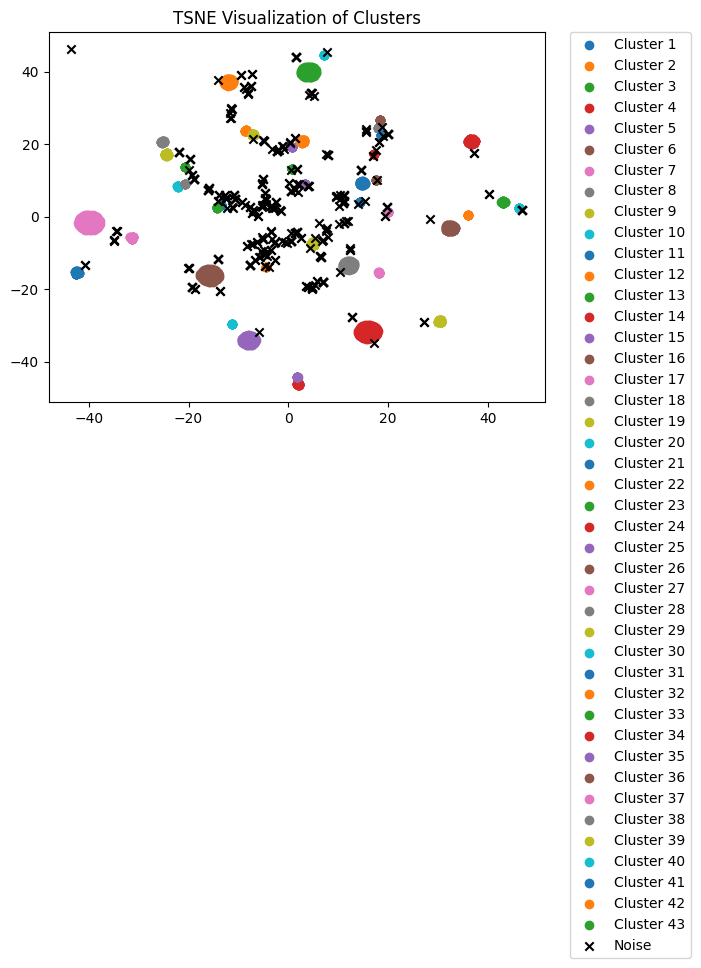

In [91]:
# Performing t-SNE to reduce the dimensionality to 2D
embedding = TSNE(n_components=2, metric='precomputed', init='random').fit_transform(distance_matrix)

# Plotting the clusters
unique_labels = np.unique(labels)
num_clusters = len(unique_labels) - 1 if -1 in unique_labels else len(unique_labels)

for i in range(num_clusters):
    cluster_indices = np.where(labels == i)[0]
    plt.scatter(embedding[cluster_indices, 0], embedding[cluster_indices, 1], label=f'Cluster {i + 1}')

# Plotting noise points as a separate cluster
if -1 in unique_labels:
    noise_indices = np.where(labels == -1)[0]
    plt.scatter(embedding[noise_indices, 0], embedding[noise_indices, 1], label='Noise', marker='x', c='black')

plt.title("TSNE Visualization of Clusters")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
tSNE = plt.show()
tSNE

In [92]:
def plot_clusters(distance_matrix, labels):
    # Ignore UMAP warning
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning)
        
        # Perform dimensionality reduction using UMAP
        reducer = umap.UMAP(metric='precomputed', n_neighbors=5, random_state=42)
        embedding = reducer.fit_transform(distance_matrix)

    fig, ax = plt.subplots()

    # Plot the clusters
    unique_labels = np.unique(labels)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

    for label, color in zip(unique_labels, colors):
        if label == -1:
            # Noise points
            color = 'gray'

        mask = labels == label
        x, y = embedding[mask].T
        ax.scatter(x, y, color=color, label=f"Cluster {label + 1}" if label != -1 else "Noise")

    ax.set_title("UMAP Visualization of Clusters")
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.show()

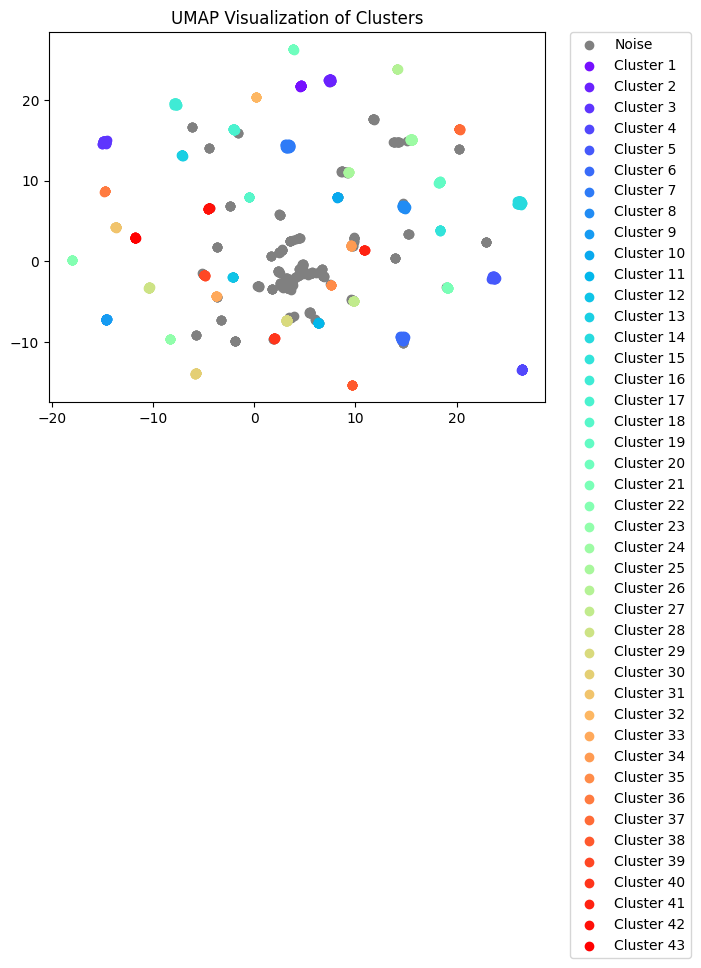

In [93]:
plot_clusters(distance_matrix, labels)

In [94]:
import hdbscan
from sklearn.metrics import silhouette_score

# Converting similarity matrix to distance matrix
distance_matrix = 1 - similarity_matrix

# Ensuring diagonal elements are zero
np.fill_diagonal(distance_matrix, 0)

# Performing HDBSCAN clustering
clustering = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=8, cluster_selection_epsilon=0.1).fit(distance_matrix)
labels = clustering.labels_

      # Ignore -1 labels since they represent noise points
mask = labels != -1
filtered_labels = labels[mask]
filtered_distance_matrix = distance_matrix[mask][:, mask]

# Calculating silhouette score
if len(set(filtered_labels)) > 1:
    silhouette = silhouette_score(filtered_distance_matrix, filtered_labels, metric='precomputed')
    print(f"Silhouette score: {silhouette}")

# Printing the clustering results
unique_labels = np.unique(labels)
num_clusters = len(unique_labels) - 1 if -1 in unique_labels else len(unique_labels)
print(f"Number of clusters: {num_clusters}")
for i in range(num_clusters):
    print(f"Cluster {i + 1}: {np.where(labels == i)[0]}")

Silhouette score: 0.9112979313491729
Number of clusters: 48
Cluster 1: [  50   74  130  131  153  217  241  258  267  283  333  371  451  461
  502  571  596  600  631  632  644  649  711  766  771  814  819  852
  853 1026 1050 1152 1220 1240 1253 1257 1263 1270 1292 1349 1412 1415
 1427]
Cluster 2: [   4   76  188  386  442  545  586  679 1211]
Cluster 3: [ 111  202  320  380  555  638  653  890  929 1054]
Cluster 4: [  31   82  128  193  211  220  266  415  434  446  455  459  464  492
  518  615  624  659  688  692  737  764  808  854  868  887  891  913
  918  933  985  987 1024 1139 1280 1293 1302 1304 1319 1331 1375 1390
 1426 1445]
Cluster 5: [  26   72   90  119  149  180  248  364  425  458  493  534  621  680
  829  882  894  925 1040 1067 1154 1383 1402]
Cluster 6: [  45  182  245  325  357  472  595  672  693  749  966 1052 1071 1084
 1284 1301 1330]
Cluster 7: [   1    3   52   63   75   84   87  106  136  156  190  207  398  447
  504  509  516  526  612  623  660  663  

In [95]:
# Defining a range of cluster numbers to test
cluster_range = range(2, 80)

# Initializing lists to store the evaluation metrics for K-means and Agglomerative Hierarchical clustering
kmeans_elbow = []
kmeans_silhouette = []
kmeans_calinski = []
agglo_silhouette = []
agglo_calinski = []

In [96]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import AgglomerativeClustering

for k in cluster_range:
    # K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_clusters = kmeans.fit_predict(distance_matrix)

    # Agglomerative Hierarchical clustering
    agglo = AgglomerativeClustering(n_clusters=k)
    agglo_clusters = agglo.fit_predict(distance_matrix)

    # Evaluation metrics
    kmeans_elbow.append(kmeans.inertia_)
    kmeans_silhouette.append(silhouette_score(distance_matrix, kmeans_clusters))
    kmeans_calinski.append(calinski_harabasz_score(distance_matrix, kmeans_clusters))
    agglo_silhouette.append(silhouette_score(distance_matrix, agglo_clusters))
    agglo_calinski.append(calinski_harabasz_score(distance_matrix, agglo_clusters))

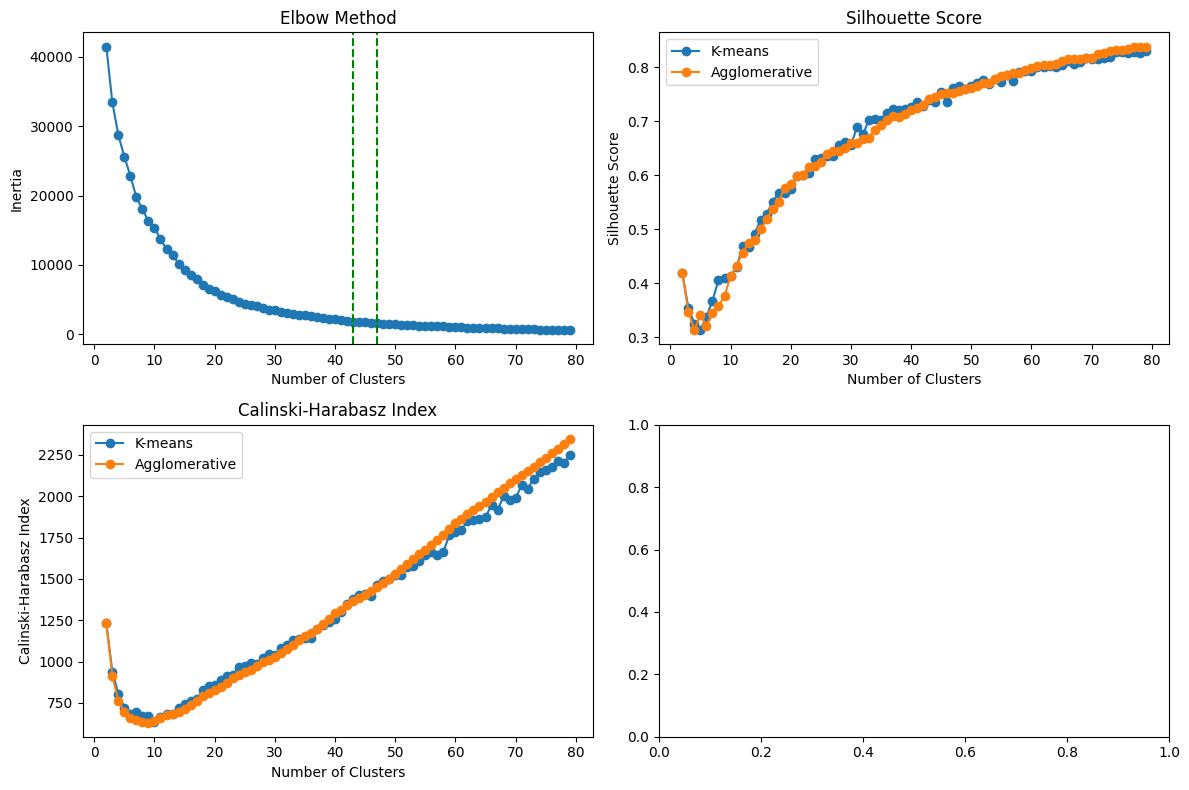

In [97]:
# Plotting the evaluation metrics
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].plot(cluster_range, kmeans_elbow, 'o-', label='K-means')
axs[0, 0].set_title('Elbow Method')
axs[0, 0].set_xlabel('Number of Clusters')
axs[0, 0].set_ylabel('Inertia')

axs[0, 1].plot(cluster_range, kmeans_silhouette, 'o-', label='K-means')
axs[0, 1].plot(cluster_range, agglo_silhouette, 'o-', label='Agglomerative')
axs[0, 1].set_title('Silhouette Score')
axs[0, 1].set_xlabel('Number of Clusters')
axs[0, 1].set_ylabel('Silhouette Score')

axs[1, 0].plot(cluster_range, kmeans_calinski, 'o-', label='K-means')
axs[1, 0].plot(cluster_range, agglo_calinski, 'o-', label='Agglomerative')
axs[1, 0].set_title('Calinski-Harabasz Index')
axs[1, 0].set_xlabel('Number of Clusters')
axs[1, 0].set_ylabel('Calinski-Harabasz Index')

# Adding legends
axs[0, 1].legend()
axs[1, 0].legend()

# Adding vertical lines
axs[0, 0].axvline(x=43, color='g', linestyle='--')
axs[0, 0].axvline(x=47, color='g', linestyle='--')

# Adjusting layout and displaying plots
plt.tight_layout()
plt.show()

In [98]:
# Converting similarity matrix to distance matrix
distance_matrix = 1 - similarity_matrix

# Ensuring diagonal elements are zero
np.fill_diagonal(distance_matrix, 0)

# Performing K-means clustering
n_clusters = 47
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(distance_matrix)

# Performing DBSCAN clustering
clustering = DBSCAN(eps=0.1, metric='precomputed', min_samples=10).fit(distance_matrix)
dbscan_labels = clustering.labels_

# Mapping DBSCAN noise points (-1) to a new cluster label
noise_label = max(kmeans_labels) + 1
dbscan_labels[dbscan_labels == -1] = noise_label

# Combining clustering results for ensemble clustering
combined_labels = np.stack((kmeans_labels, dbscan_labels), axis=-1)

# Majority vote function
def majority_vote(labels):
    return mode(labels).mode[0]

# Computing consensus clustering
consensus_labels = np.apply_along_axis(majority_vote, 1, combined_labels)

# Printing the clustering results
unique_labels = np.unique(consensus_labels)
num_clusters = len(unique_labels)
print(f"Number of clusters: {num_clusters}")
for i in range(num_clusters):
    print(f"Cluster {i + 1}: {np.where(consensus_labels == i)[0]}")

Number of clusters: 39
Cluster 1: [   0    6   33   68  143  247  263  314  350  399  402  457  475  479
  484  497  515  527  578  593  629  716  721  727  755  785  790  848
  857  872  901  926  930  940  949  986 1015 1020 1036 1057 1062 1063
 1070 1175 1180 1203 1207 1216 1271 1321 1384 1411 1417 1424 1425 1440]
Cluster 2: [   1    9   52   63   75   84   87   88   94   98  104  106  136  156
  159  161  188  190  203  207  221  279  285  307  311  321  330  374
  398  403  435  447  494  504  509  511  516  526  552  594  612  623
  637  660  666  704  705  746  769  773  776  796  802  809  820  830
  831  835  877  878  909  911  923  993 1006 1021 1022 1049 1066 1072
 1099 1142 1162 1181 1229 1241 1251 1283 1318 1351 1360 1361 1401 1437]
Cluster 3: [   5   11   13   24   42   53   55   66   69   71   93  107  117  132
  134  158  168  177  179  204  234  238  243  249  250  261  286  287
  292  319  326  327  329  334  349  352  383  421  426  431  448  454
  467  507  521  53

In [99]:
dbscan = DBSCAN(metric='precomputed')
consensus_labels = dbscan.fit_predict(distance_matrix)
noise_label = -1  # In DBSCAN, -1 indicates noise

def plot_ensembled_clusters(distance_matrix, consensus_labels, noise_label):
    # Perform dimensionality reduction using UMAP
    reducer = umap.UMAP(metric='precomputed', n_neighbors=5, random_state=42)
    embedding = reducer.fit_transform(distance_matrix)

    fig, ax = plt.subplots()

    # Plot the clusters
    unique_labels = np.unique(consensus_labels)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

    for label, color in zip(unique_labels, colors):
        if label == noise_label:
            # Noise points
            color = 'gray'

        mask = consensus_labels == label
        x, y = embedding[mask].T
        ax.scatter(x, y, color=color, label=f"Cluster {label + 1}" if label != noise_label else "Noise")

    ax.set_title("UMAP Visualization of Clusters")
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.show()

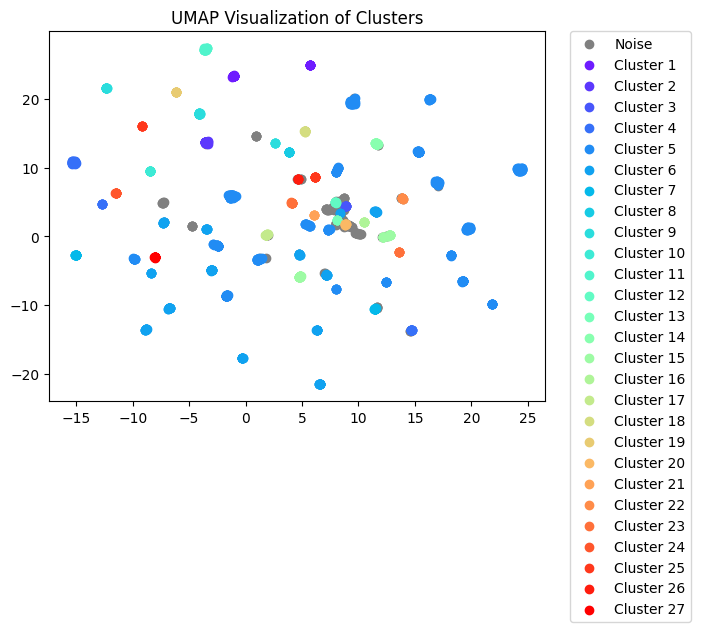

In [100]:
plot_ensembled_clusters(distance_matrix, consensus_labels, noise_label)

In [101]:
# Adding the cluster points to the dataframe
df1['cluster'] = consensus_labels

In [102]:
df1.cluster.unique()

array([ 0,  1,  2, -1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)

In [103]:
df1.head()

,file_name,text,sentence_metrics,api_metrics,action_sequences,sentence_action_dict,event_log,process_model,digraph,cluster
0,007769c9000e457eae8485221041802d,"A woman has been dating guy after guy, but it ...","{'Total number of sentences': 35, 'Number of s...","{'Total number of GPT-3 calls made': 14, 'Numb...","[(2, [prompt, user]), (3, [user, empty-call, u...","{2: ['prompt', 'user'], 3: ['user', 'empty-cal...","[[[concept:name], [concept:name]], [[concept:n...","->( X( tau, X( 'gpt3-call', 'prompt' ) ), *( -...","(->( X( tau, X( 'gpt3-call', 'prompt' ) ), *( ...",0
1,00bf170a815a42359f3aef35f5674ddc,Should College Athletes Be Paid?\n\nDo you thi...,"{'Total number of sentences': 21, 'Number of s...","{'Total number of GPT-3 calls made': 4, 'Numbe...","[(9, [prompt, user]), (10, [gpt3-call, user]),...","{9: ['prompt', 'user'], 10: ['gpt3-call', 'use...","[[[concept:name], [concept:name]], [[concept:n...","->( X( tau, X( 'gpt3-call', 'prompt' ) ), 'use...","(->( X( tau, X( 'gpt3-call', 'prompt' ) ), 'us...",1
2,00d39011efcb4533ab12076801f74f42,"A woman has been dating guy after guy, but it ...","{'Total number of sentences': 28, 'Number of s...","{'Total number of GPT-3 calls made': 25, 'Numb...","[(2, [prompt, empty-call, user]), (3, [user]),...","{2: ['prompt', 'empty-call', 'user'], 3: ['use...","[[[concept:name], [concept:name], [concept:nam...","->( X( tau, X( 'gpt3-call', 'prompt' ) ), +( X...","(->( X( tau, X( 'gpt3-call', 'prompt' ) ), +( ...",2
3,0139e814be15409dbab46c2d2d9ca07f,"An alien has kidnapped Matt Damon, not knowing...","{'Total number of sentences': 34, 'Number of s...","{'Total number of GPT-3 calls made': 8, 'Numbe...","[(1, [prompt, empty-call, user]), (2, [user]),...","{1: ['prompt', 'empty-call', 'user'], 2: ['use...","[[[concept:name], [concept:name], [concept:nam...","->( X( tau, X( 'gpt3-call', 'prompt' ) ), +( '...","(->( X( tau, X( 'gpt3-call', 'prompt' ) ), +( ...",-1
4,01650a401e614c38a04a904165a5784f,"When you're 28, science discovers a drug that ...","{'Total number of sentences': 20, 'Number of s...","{'Total number of GPT-3 calls made': 16, 'Numb...","[(3, [prompt, user]), (4, [gpt3-call]), (5, [g...","{3: ['prompt', 'user'], 4: ['gpt3-call'], 5: [...","[[[concept:name], [concept:name]], [[concept:n...","->( X( tau, X( 'gpt3-call', 'prompt' ) ), X( t...","(->( X( tau, X( 'gpt3-call', 'prompt' ) ), X( ...",-1


In [104]:
cluster_counts = df1['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'count']
print(cluster_counts)

    cluster  count
0         4    585
1        -1    160
2         5    156
3         3     81
4        14     46
5         1     44
6        10     44
7         0     40
8         8     40
9        13     37
10        6     35
11       16     18
12        9     16
13       26     16
14       22     15
15       24     15
16       17     14
17        7     11
18       23     10
19       18     10
20       21      9
21        2      8
22       19      8
23       15      7
24       11      6
25       12      5
26       20      5
27       25      5


In [105]:
def get_most_common_digraph_and_model(cluster_df):
    digraph_counter = Counter(cluster_df['digraph'])
    process_model_counter = Counter(cluster_df['process_model'])

    most_common_digraph = digraph_counter.most_common(1)[0][0]
    most_common_process_model = process_model_counter.most_common(1)[0][0]

    return most_common_digraph, most_common_process_model

def parse_process_model(model_string):
    tokens = []
    i = 0
    while i < len(model_string):
        c = model_string[i]
        if c in ["(", ")", ",", "+", "*", "X"]:
            if c == ")" and i+1 < len(model_string) and model_string[i+1] == ",":
                tokens.append("),")
                i += 1
            else:
                tokens.append(c)
        elif c == "-":
            if i+1 < len(model_string) and model_string[i+1] == ">":
                tokens.append("->")
                i += 1
        elif c == " ":
            pass
        elif c == "'":
            start = i + 1
            end = model_string.find("'", start)
            tokens.append(model_string[start:end])
            i = end
        elif c.isalpha():
            start = i
            while i < len(model_string) and (model_string[i].isalnum() or model_string[i] == "_"):
                i += 1
            tokens.append(model_string[start:i])
            i -= 1
        i += 1
    return tokens

def translate_recursive(tokens, idx=0):
    description = ""
    while idx < len(tokens):
        token = tokens[idx]

        if token == "->":
            description += " followed by "
        elif token == "+":
            description += " in parallel with "
        elif token == ",":
            description += ", "
        elif token == "tau":
            description += "a silent action"
        elif token == "X":
            inner_description, idx = translate_recursive(tokens, idx + 2)
            description += f"an exclusive choice between {inner_description}"
        elif token == "*":
            loop_start_idx = idx + 2
            inner_description, loop_end_idx = translate_recursive(tokens, loop_start_idx)
            loop_description = f"a loop between the actions {inner_description}, meaning that these actions can be repeated multiple times in sequence"
            description += loop_description
            idx = loop_end_idx
        elif token == "(":
            inner_description, idx = translate_recursive(tokens, idx + 1)
            description += inner_description
        elif token == ")":
            return description, idx
        elif token == "),":
            description += " and "
        else:
            description += f"the action '{token}'"

        idx += 1

    return description, idx

def remove_consecutive_substrings(s, sub):
    while sub + sub in s:
        s = s.replace(sub + sub, sub)
    return s

def translate_process_model(model_string):
    # Combine parsing and translation functions
    tokens = parse_process_model(model_string)
    description, _ = translate_recursive(tokens)

    # Remove consecutive occurrences of the phrase
    repeating_phrase = ", meaning that these actions can be repeated multiple times in sequence"
    description = remove_consecutive_substrings(description, repeating_phrase)

    return description

# Grouping the dataframe by cluster
grouped_df = df1.groupby('cluster')

# Create a dictionary to store cluster details
clusters = {}

# Finding the most common digraph and process model for each cluster
for cluster, group in grouped_df:
    most_common_digraph, most_common_process_model = get_most_common_digraph_and_model(group)
    cluster_count = cluster_counts[cluster_counts['cluster'] == cluster]['count'].values[0]
    tree_string = str(most_common_process_model)
    clusters[cluster] = {
        'count': cluster_count,
        'most_common_digraph': str(most_common_digraph),
        'most_common_process_model': str(most_common_process_model),
        'translation': translate_process_model(tree_string),  # Add this line
    }

# Sort the clusters dictionary by count in descending order
clusters_dict = dict(sorted(clusters.items(), key=lambda item: item[1]['count'], reverse=True))
clusters_dict

{4: {'count': 585,
  'most_common_digraph': 'DiGraph with 13 nodes and 14 edges',
  'most_common_process_model': "->( X( tau, X( ->( 'gpt3-call', X( tau, 'modify-gpt3' ) ), 'prompt' ) ), *( ->( 'user', X( tau, 'empty-call' ) ), tau ) )",
  'translation': " followed by an exclusive choice between a silent action, an exclusive choice between  followed by the action 'gpt3-call', an exclusive choice between a silent action, the action 'modify-gpt3' and the action 'prompt' and a loop between the actions  followed by the action 'user', an exclusive choice between a silent action, the action 'empty-call' and a silent action, meaning that these actions can be repeated multiple times in sequence"},
 -1: {'count': 160,
  'most_common_digraph': 'DiGraph with 10 nodes and 10 edges',
  'most_common_process_model': "->( X( tau, 'prompt' ), *( ->( 'user', X( tau, *( 'empty-call', tau ) ) ), tau ) )",
  'translation': " followed by an exclusive choice between a silent action, the action 'prompt' and a

In [125]:
len(clusters_dict)

28

In [106]:
# Finding the most common digraph and process model for each cluster
for cluster, group in grouped_df:
    most_common_digraph, most_common_process_model = get_most_common_digraph_and_model(group)
    print(f"Cluster {cluster}:")
    print("Most common DiGraph:")
    print(most_common_digraph)
    print("Most common Process Model:")
    print(most_common_process_model)
    print("\n")

Cluster -1:
Most common DiGraph:
DiGraph with 10 nodes and 10 edges
Most common Process Model:
->( X( tau, 'prompt' ), *( ->( 'user', X( tau, *( 'empty-call', tau ) ) ), tau ) )


Cluster 0:
Most common DiGraph:
DiGraph with 12 nodes and 14 edges
Most common Process Model:
->( X( tau, X( 'gpt3-call', 'prompt' ) ), *( ->( 'user', X( tau, *( 'empty-call', tau ) ) ), tau ) )


Cluster 1:
Most common DiGraph:
DiGraph with 9 nodes and 9 edges
Most common Process Model:
->( X( tau, X( 'gpt3-call', 'prompt' ) ), 'user', X( tau, 'empty-call' ) )


Cluster 2:
Most common DiGraph:
DiGraph with 12 nodes and 14 edges
Most common Process Model:
->( X( tau, X( 'gpt3-call', 'prompt' ) ), +( X( tau, *( 'empty-call', tau ) ), *( 'user', tau ) ) )


Cluster 3:
Most common DiGraph:
DiGraph with 11 nodes and 12 edges
Most common Process Model:
->( X( tau, X( 'gpt3-call', 'prompt' ) ), *( ->( 'user', X( tau, 'empty-call' ) ), tau ) )


Cluster 4:
Most common DiGraph:
DiGraph with 13 nodes and 14 edges
Most

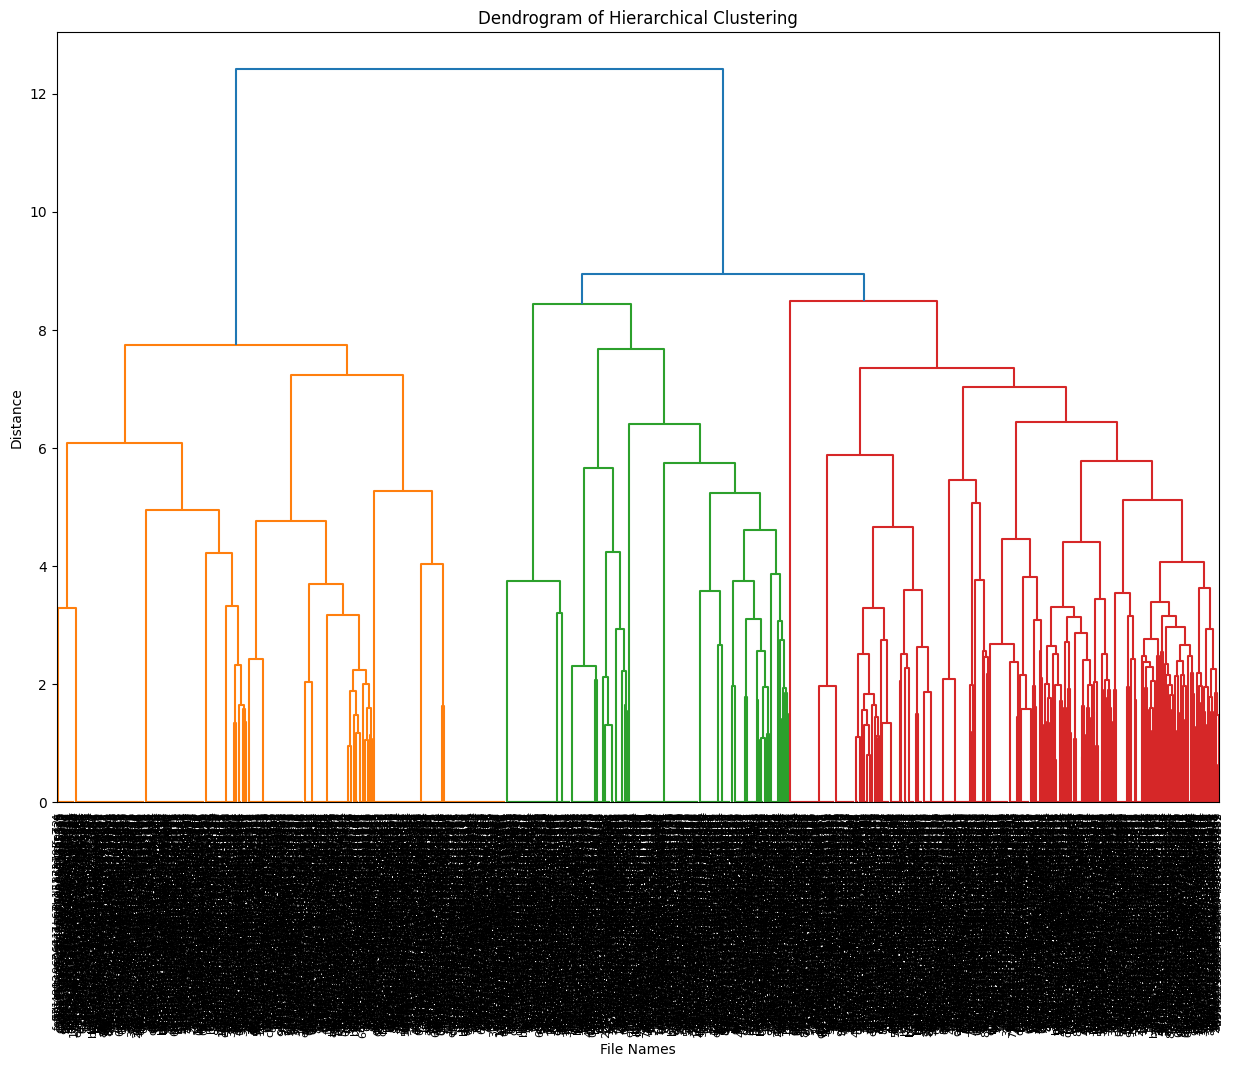

In [107]:
# Performing hierarchical/agglomerative clustering using average linkage
Z = linkage(distance_matrix, method='average')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=df1['file_name'].values, leaf_rotation=90, leaf_font_size=8)
plt.xlabel('File Names')
plt.ylabel('Distance')
plt.title('Dendrogram of Hierarchical Clustering')
HCdendogram = plt.show()
HCdendogram

In [108]:
# Cutting the dendrogram using a distance threshold
distance_threshold = 3
cluster_labels = fcluster(Z, t=distance_threshold, criterion='distance')

In [109]:
# Printing the number of unique clusters
print("Number of clusters:", len(np.unique(cluster_labels)))

Number of clusters: 56


In [110]:
# Defining the number of clusters
num_clusters = 54

# Assigning cluster labels
df1['cluster_labels'] = fcluster(Z, num_clusters, criterion='maxclust')

In [111]:
# Example usage
model_string = "->( X( tau, X( 'prompt', 'gpt3-call' ) ), X( tau, +( *( 'user', tau ) ), X( tau, *( 'empty-call', 'modify-gpt3' ) ) ) )"
print(translate_process_model(model_string))

model_string1 = "->( X( tau, X( 'prompt', ->( 'gpt3-call', X( tau, 'modify-gpt3' ) ) ) ), X( tau, *( 'user', *( 'empty-call', tau ) ) ) )"
print(translate_process_model(model_string1))

 followed by an exclusive choice between a silent action, an exclusive choice between the action 'prompt', the action 'gpt3-call' and an exclusive choice between a silent action,  in parallel with a loop between the actions the action 'user', a silent action, meaning that these actions can be repeated multiple times in sequence and an exclusive choice between a silent action, a loop between the actions the action 'empty-call', the action 'modify-gpt3', meaning that these actions can be repeated multiple times in sequence
 followed by an exclusive choice between a silent action, an exclusive choice between the action 'prompt',  followed by the action 'gpt3-call', an exclusive choice between a silent action, the action 'modify-gpt3' and an exclusive choice between a silent action, a loop between the actions the action 'user', a loop between the actions the action 'empty-call', a silent action, meaning that these actions can be repeated multiple times in sequence


In [112]:
def apply_translation(row):
    # Convert the ProcessTree object to its string representation before translation
    return translate_process_model(str(row['process_model']))

In [113]:
df1['translated_description'] = df1.apply(apply_translation, axis=1)

In [114]:
df1.to_csv("sequential_clustering.csv")

### Alpha Mining

In [115]:
# Applying the Alpha Miner to the 'event_log' column and storing the resulting Petri net, initial marking, and final marking in new columns
df1 = df1
df1[['petri_net', 'initial_marking', 'final_marking']] = df1['event_log'].apply(lambda log: alpha_miner.apply(log)).apply(pd.Series)

In [116]:
# Visualising the Petri nets

# Set the working directory to the Alpha_Trees folder
new_dir1 = os.path.join(current_dir, 'CoAuthorViz/Alpha_Trees')
os.chdir(new_dir1)
# Create and save process trees for each process model
for index, row in df1.iterrows():
    png_file = f"process_model_alpha{index}.png"
    if not os.path.exists(png_file):
        gviz = pn_visualizer.apply(row['petri_net'], row['initial_marking'], row['final_marking'])
        pt_visualizer.save(gviz, png_file)

# Change back to the main working directory (if needed)
os.chdir(current_dir)

In [117]:
# Calculating the Jaccard similarity between two Petri nets
def jaccard_similarity(petri_net1, petri_net2):
    arcs1 = {(arc.source.name, arc.target.name) for arc in petri_net1.arcs}
    arcs2 = {(arc.source.name, arc.target.name) for arc in petri_net2.arcs}

    intersection = len(arcs1.intersection(arcs2))
    union = len(arcs1.union(arcs2))

    return intersection / union

In [118]:
# Calculating the Jaccard similarity matrix for the Petri nets
num_rows = len(df1)
similarity_matrix = np.zeros((num_rows, num_rows))

for i in range(num_rows):
    for j in range(num_rows):
        similarity_matrix[i, j] = jaccard_similarity(df1['petri_net'].iloc[i], df1['petri_net'].iloc[j])

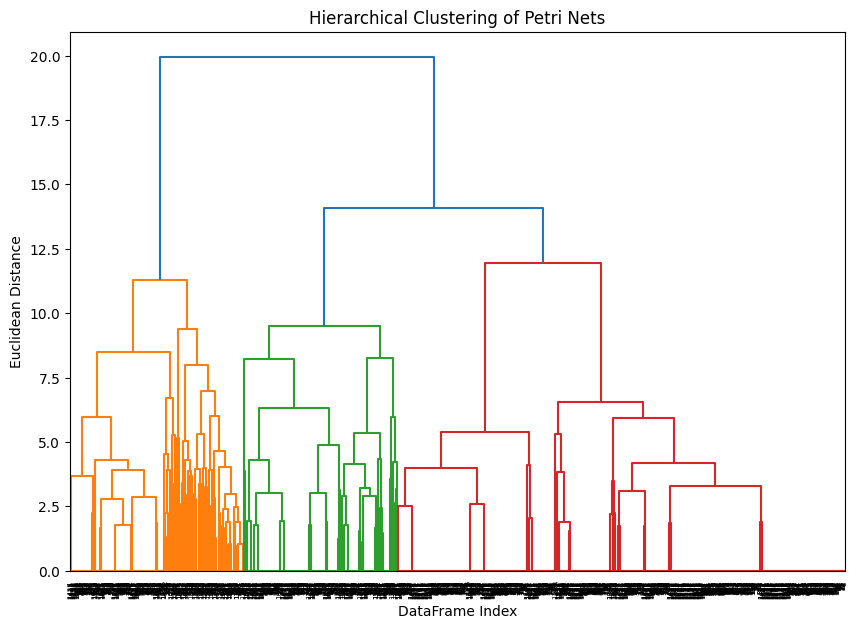

In [119]:
# Performing hierarchical clustering using the Jaccard similarity matrix

clustering = linkage(similarity_matrix, method='complete', metric='euclidean')

plt.figure(figsize=(10, 7))
dendrogram(clustering)
plt.xlabel('DataFrame Index')
plt.ylabel('Euclidean Distance')
plt.title('Hierarchical Clustering of Petri Nets')
Petridendogram = plt.show()
Petridendogram

In [120]:
threshold = 2.5  # Setting an appropriate threshold based on the dendrogram
clusters = fcluster(clustering, threshold, criterion='distance')
df1['alpha_cluster'] = clusters

In [121]:
df1.head()

,file_name,text,sentence_metrics,api_metrics,action_sequences,sentence_action_dict,event_log,process_model,digraph,cluster,cluster_labels,translated_description,petri_net,initial_marking,final_marking,alpha_cluster
0,007769c9000e457eae8485221041802d,"A woman has been dating guy after guy, but it ...","{'Total number of sentences': 35, 'Number of s...","{'Total number of GPT-3 calls made': 14, 'Numb...","[(2, [prompt, user]), (3, [user, empty-call, u...","{2: ['prompt', 'user'], 3: ['user', 'empty-cal...","[[[concept:name], [concept:name]], [[concept:n...","->( X( tau, X( 'gpt3-call', 'prompt' ) ), *( -...","(->( X( tau, X( 'gpt3-call', 'prompt' ) ), *( ...",0,17,followed by an exclusive choice between a sil...,"places: [ ({'gpt3-call', 'prompt'}, {'user'}),...",{start: 1},{end: 1},67
1,00bf170a815a42359f3aef35f5674ddc,Should College Athletes Be Paid?\n\nDo you thi...,"{'Total number of sentences': 21, 'Number of s...","{'Total number of GPT-3 calls made': 4, 'Numbe...","[(9, [prompt, user]), (10, [gpt3-call, user]),...","{9: ['prompt', 'user'], 10: ['gpt3-call', 'use...","[[[concept:name], [concept:name]], [[concept:n...","->( X( tau, X( 'gpt3-call', 'prompt' ) ), 'use...","(->( X( tau, X( 'gpt3-call', 'prompt' ) ), 'us...",1,20,followed by an exclusive choice between a sil...,"places: [ ({'gpt3-call', 'prompt'}, {'user'}),...",{start: 1},{end: 1},71
2,00d39011efcb4533ab12076801f74f42,"A woman has been dating guy after guy, but it ...","{'Total number of sentences': 28, 'Number of s...","{'Total number of GPT-3 calls made': 25, 'Numb...","[(2, [prompt, empty-call, user]), (3, [user]),...","{2: ['prompt', 'empty-call', 'user'], 3: ['use...","[[[concept:name], [concept:name], [concept:nam...","->( X( tau, X( 'gpt3-call', 'prompt' ) ), +( X...","(->( X( tau, X( 'gpt3-call', 'prompt' ) ), +( ...",2,26,followed by an exclusive choice between a sil...,"places: [ ({'gpt3-call'}, {'user'}), end, star...",{start: 1},{end: 1},9
3,0139e814be15409dbab46c2d2d9ca07f,"An alien has kidnapped Matt Damon, not knowing...","{'Total number of sentences': 34, 'Number of s...","{'Total number of GPT-3 calls made': 8, 'Numbe...","[(1, [prompt, empty-call, user]), (2, [user]),...","{1: ['prompt', 'empty-call', 'user'], 2: ['use...","[[[concept:name], [concept:name], [concept:nam...","->( X( tau, X( 'gpt3-call', 'prompt' ) ), +( '...","(->( X( tau, X( 'gpt3-call', 'prompt' ) ), +( ...",-1,28,followed by an exclusive choice between a sil...,"places: [ ({'gpt3-call', 'prompt'}, {'empty-ca...",{start: 1},{end: 1},32
4,01650a401e614c38a04a904165a5784f,"When you're 28, science discovers a drug that ...","{'Total number of sentences': 20, 'Number of s...","{'Total number of GPT-3 calls made': 16, 'Numb...","[(3, [prompt, user]), (4, [gpt3-call]), (5, [g...","{3: ['prompt', 'user'], 4: ['gpt3-call'], 5: [...","[[[concept:name], [concept:name]], [[concept:n...","->( X( tau, X( 'gpt3-call', 'prompt' ) ), X( t...","(->( X( tau, X( 'gpt3-call', 'prompt' ) ), X( ...",-1,28,followed by an exclusive choice between a sil...,"places: [ ({'empty-call'}, {'modify-gpt3'}), (...",{start: 1},{end: 1},72


In [122]:
end_time = datetime.datetime.now()
total_time = end_time - start_time
total_time

datetime.timedelta(seconds=564, microseconds=33020)

In [123]:
total_seconds = total_time.total_seconds()
minutes = total_seconds / 60

print(minutes)

9.400550333333333
